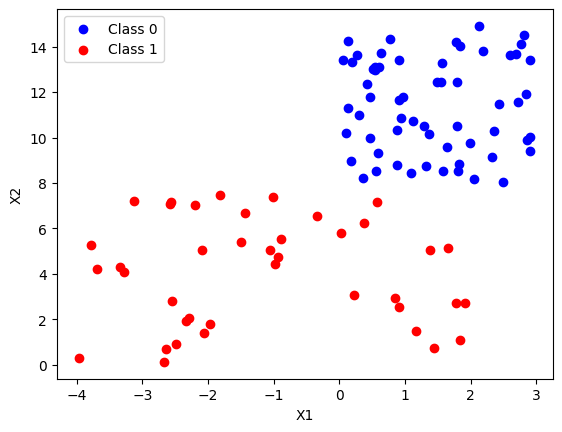

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 随机种子（确保结果可复现）
np.random.seed(42)  

# 生成 Class 0 的样本：x1 偏大，x2 偏大
class0_size = 60
x1_class0 = np.random.uniform(0, 3, class0_size)  # x1 在 [0, 3) 均匀采样
x2_class0 = np.random.uniform(8, 15, class0_size) # x2 在 [8, 15) 均匀采样
class0 = np.column_stack((x1_class0, x2_class0))  # 合并为特征矩阵
labels0 = np.zeros(class0_size)                   # 标签：0

# 生成 Class 1 的样本：x1 偏小，x2 偏小
class1_size = 40
x1_class1 = np.random.uniform(-4, 2, class1_size) # x1 在 [-4, 2) 均匀采样
x2_class1 = np.random.uniform(0, 8, class1_size)  # x2 在 [0, 8) 均匀采样
class1 = np.column_stack((x1_class1, x2_class1))  # 合并为特征矩阵
labels1 = np.ones(class1_size)                    # 标签：1

# 合并所有样本和标签
X = np.vstack((class0, class1))
y = np.hstack((labels0, labels1))
plt.scatter(class0[:, 0], class0[:, 1], c='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], c='red', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [31]:
def loadDataSet():
    return X_with_X0, y

In [36]:
# 接下来，我们介绍几个最优化算法，并利用它们训练出一个非线性函数用于分类。
"""
Logistic回归的一般过程
1. 收集数据：采用任意方法收集数据。
2. 准备数据：由于需要进行距离计算，因此要求数据类型为数值型。
另外，结构化数据格式则最佳。
3. 分析数据：采用任意方法对数据进行分析。
4. 训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的
分类回归系数。
5. 测试算法：一旦训练步骤完成，分类将会很快。
6. 使用算法：首先，我们需要一些输入数据，并将其转换成对应的结
构化数值；接着，基于训练好的回归系数就可以对这些数值进行简
单的回归计算，判定它们属于哪个类别；在这之后，我们就可以在
输出的类别上做一些其他分析工作。
包括基本的梯度上升法和一个改进的随机梯度上升法，这些最优化算法将用于分类器的训练。
"""

# 5.1 基于Logistic回归和Sigmoid函数的分类
"""
Logistic回归
优点：计算代价不高，易于理解和实现。
缺点：容易欠拟合，分类精度可能不高。
适用数据类型：数值型和标称型数据
实现Logistic回归分类器，我们可以在每个特征上乘以一个回归
系数，然后把所有的结果值相加，将这个总和代入Sigmoid函数中，进而得
到一个范围在0~1之间的数值。
"""

# 梯度上升算法用来求函数的最大值，而梯度下降算法用来求函数的最小值。
# 梯度上升法的伪代码如下
"""
每个回归系数初始化为1
重复R次：
计算整个数据集的梯度
使用`alpha × gradient`更新回归系数的向量
返回回归系数
"""
def sigmoid(inX):
    return 1.0/(1+exp(-inX))
    
from numpy import ones

def gradAscent(dataMatrix, labelMat):
    """
    使用梯度上升法求解逻辑回归的最佳参数权重
    
    参数:
        dataMatrix: 特征矩阵，形状为 [样本数, 特征数]
        labelMat: 标签矩阵，形状为 [样本数, 1]
        
    返回:
        weights: 最优权重向量，形状为 [特征数, 1]
    """
    # 获取样本数和特征数
    m, n = dataMatrix.shape
    
    # 设置学习率和最大迭代次数
    alpha = 0.001  # 学习率（步长）
    maxCycles = 500  # 最大迭代次数
    
    # 初始化权重向量（全1向量）
    weights = ones((n, 1))  # 形状 [特征数, 1]
    
    # 开始梯度上升迭代
    for k in range(maxCycles):
        # 计算当前权重下的sigmoid预测值
        # h = 1/(1 + exp(-z)), 其中 z = dataMatrix * weights
        h = sigmoid(np.dot(dataMatrix, weights))  # 形状 [样本数, 1]
        """
        矩阵运算。变量h不是一个数而是一个列向量，列向量的元素个数等于样本个
        数，这里是100。对应地，运算dataMatrix * weights代表的不是一次乘
        积计算，事实上该运算包含了300次的乘积。
        """
        # 计算预测值与真实标签的误差
        error = (labelMat - h)  # 形状 [样本数, 1]
        if k % 100 == 0:
            print(f"第{k+1}次迭代，error为{sum(error)}")
        # 更新权重：weights = weights + alpha * 梯度
        # 梯度 = dataMatrix.T * error (矩阵乘法)
        weights = weights + alpha * np.dot(dataMatrix.transpose(),error)
    
    # 返回训练完成的最优权重
    return weights

In [ ]:
X_with_X0 = np.hstack((np.ones((X.shape[0], 1)), X))
X_with_X0

In [15]:
"""
我们现在采用的是100个样
本的简单数据集，它包含了两个特征X1和X2，再加上第0维特征X0，所以
dataMath里存放的将是100×3的矩阵
"""
y_reshape = y.reshape((100,1))

In [37]:
from numpy import exp
weights = gradAscent(X_with_X0,y_reshape)

第1次迭代，error为[-54.55813631]
第101次迭代，error为[6.2005316]
第201次迭代，error为[5.11701487]
第301次迭代，error为[4.34056531]
第401次迭代，error为[3.75553959]


In [29]:
# 5.2.3 分析数据：画出决策边界
def plotBestFit(wei):
    # 导入matplotlib.pyplot用于绘图
    import matplotlib.pyplot as plt
    # 将矩阵类型的权重转换为数组类型
    weights = wei

    # 加载数据集，获取特征矩阵和标签向量
    dataMat, labelMat = loadDataSet()
    # 获取数据集的样本数量
    n = dataMat.shape[0]
    # 初始化两个类别的样本坐标列表
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    # 遍历所有样本，根据标签区分不同类别并存储坐标
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataMat[i, 1]); ycord1.append(dataMat[i, 2])
        else:
            xcord2.append(dataMat[i, 1]); ycord2.append(dataMat[i, 2])
    # 创建图形对象
    fig = plt.figure()
    # 添加子图，1行1列第1个
    ax = fig.add_subplot(111)
    # 绘制类别1的样本，红色方形标记
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    # 绘制类别0的样本，绿色圆形标记
    ax.scatter(xcord2, ycord2, s=30, c='green')
    # 生成X轴数据，范围从-3.0到3.0，步长0.1
    x = np.arange(-4.0, 2.0, 0.1)
    # ❶ 根据逻辑回归模型参数计算决策边界（最佳拟合直线）
    # 逻辑回归模型为：w0 + w1*x1 + w2*x2 = 0，变形得到x2关于x1的表达式
    y = (-weights[0]-weights[1] * x) / weights[2]
    # 绘制决策边界直线
    ax.plot(x, y)
    # 设置X轴和Y轴标签
    plt.xlabel('X1'); plt.ylabel('X2');
    # 显示图形
    plt.show()

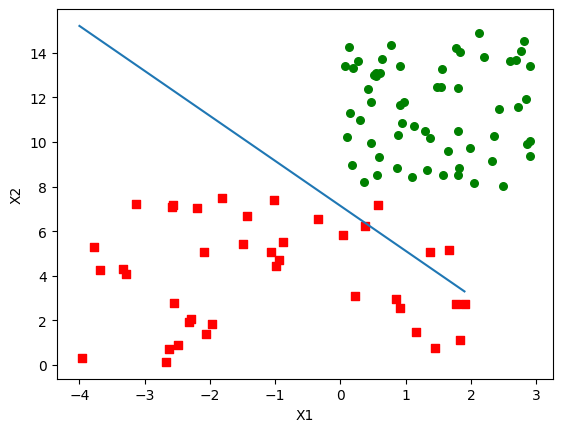

In [32]:
plotBestFit(weights)

In [38]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    """
    随机梯度上升算法（改进版）
    参数：
        dataMatrix: 特征矩阵，shape为(m, n)，m为样本数，n为特征数
        classLabels: 标签列表，shape为(m,)
        numIter: 迭代次数，默认150次
    返回：
        weights: 训练得到的权重向量
    """
    # 获取样本数量和特征数量
    m, n = np.shape(dataMatrix)
    # 初始化权重向量为全1
    weights = np.ones(n)
    
    # 外层循环控制迭代轮数
    for j in range(numIter):
        # 生成样本索引列表，用于随机选取样本
        dataIndex = list(range(m))
        
        # 内层循环遍历所有样本（每次随机选择一个）
        for i in range(m):
            # 动态调整学习率：随迭代次数增加而减小，保证后期收敛稳定
            alpha = 4 / (1.0 + j + i) + 0.01
            """
            在降低alpha的函数中，alpha每次
            减少1/(j+i) ，其中j是迭代次数，i是样本点的下标1 。这样
            当j<<max(i)时，alpha就不是严格下降的。避免参数的严格下降也常见于
            模拟退火算法等其他优化算法中。
            """
            # 随机选择一个样本索引
            randIndex = int(random.uniform(0, len(dataIndex)))
            # 获取随机选中的样本
            randSample = dataMatrix[randIndex]
            
            # 使用np.dot计算特征与权重的内积（替代元素级乘法+sum）
            # 等价于：sum(randSample * weights)
            z = np.dot(randSample, weights)
            # 计算sigmoid预测值，这
            h = sigmoid(z)
            
            # 计算预测误差（真实标签 - 预测概率）
            error = classLabels[randIndex] - h
            
            # 使用np.dot的思路更新权重（向量加法）
            # 等价于：weights = weights + alpha * error * randSample
            weights = weights + alpha * error * randSample
            
            # 删除已使用的样本索引，避免重复选择
            del(dataIndex[randIndex])
    
    return weights
    

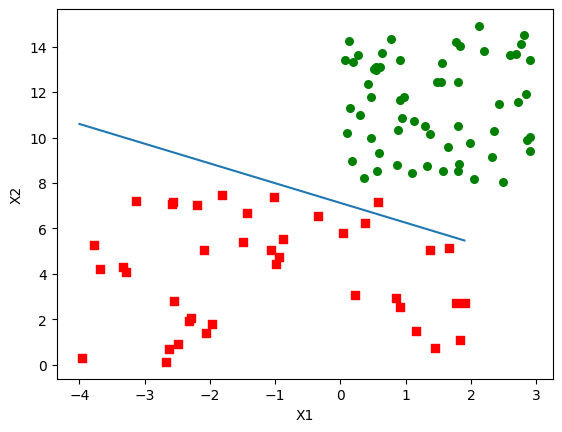

In [40]:
import random
plotBestFit(stocGradAscent1(X_with_X0,y_reshape))

In [41]:
# 5.3 示例：从疝气病症预测病马的死亡率
!pip install ucimlrepo

Looking in indexes: https://mirrors.cloud.tencent.com/pypi/simple


In [42]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
horse_colic = fetch_ucirepo(id=47) 
  
# data (as pandas dataframes) 
X = horse_colic.data.features 
y = horse_colic.data.targets 
  
# metadata 
print(horse_colic.metadata) 
  
# variable information 
print(horse_colic.variables) 


{'uci_id': 47, 'name': 'Horse Colic', 'repository_url': 'https://archive.ics.uci.edu/dataset/47/horse+colic', 'data_url': 'https://archive.ics.uci.edu/static/public/47/data.csv', 'abstract': 'Well documented attributes; 368 instances with 28 attributes (continuous, discrete, and nominal); 30% missing values', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 368, 'num_features': 27, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age'], 'target_col': ['surgical_lesion'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C58W23', 'creators': ['Mary McLeish', 'Matt Cecile'], 'intro_paper': None, 'additional_info': {'summary': '2 data files: \r\n      -- horse-colic.data: 300 training instances\r\n      -- horse-colic.test: 68 test instances\r\n\r\nPossible class attributes: 24 (whether lesion

In [45]:
X.sample()

,surgery,age,hospital_number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdominocentesis_total_protein,outcome,lesion_site,lesion_type,lesion_subtype,cp_data
65,1.0,1,534885,NaN,60.0,36.0,3.0,1.0,3.0,1.0,...,4.0,26.0,72.0,2.0,1.0,1.0,2208,0,0,2


In [46]:
y.sample()

,surgical_lesion
295,2


In [49]:
"""
该数据集还存在
一个问题，数据集中有30%的数据值是缺失的。下面将首先介绍如何处理
数据集中的数据缺失问题，然后再利用Logistic回归和随机梯度上升算法来
预测病马的生死。

"""
# 5.3.1 准备数据：处理数据中的缺失值
"""
使用可用特征的均值来填补缺失值；
使用特殊值来填补缺失值，如-1；
忽略有缺失值的样本；
使用相似样本的均值添补缺失值；
使用另外的机器学习算法预测缺失值。

预处理中做的第二件事是，如果在测试数据集中发现了一条数据的类别标
签已经缺失，那么我们的简单做法是将该条数据丢弃。这是因为类别标签
与特征不同，很难确定采用某个合适的值来替换。采用Logistic回归进行分
类时这种做法是合理的，而如果采用类似kNN的方法就可能不太可行。
"""
# 5.3.2 测试算法：用Logistic回归进行分类
def classifyVector(inX, weights):
    prob = sigmoid(np.dot(inX, weights))
    if prob > 0.5:
        return 1.0
    return 0.0

# ---------------------- 2. 核心修改：用ucimlrepo获取数据，替代读本地txt ----------------------
def colicTest():
    # ❶ 从ucimlrepo获取马疝病数据集（ID=47）
    # horse_colic = fetch_ucirepo(id=47)
    
    # ❷ 提取特征矩阵X和标签向量y，并做数据适配
    # X：特征矩阵（368个样本，21个关键特征，排除原数据中无关的7个特征，与原txt的21个特征对应）
    # 原数据集的28个特征中，前21个为核心特征（与原txt一致），后7个为冗余信息，故取前21列
    X = horse_colic.data.features.iloc[:, :21].values  # 转换为numpy数组，shape=(368,21)
    
    # y：标签向量（原标签为1=存活、2=死亡，需转换为原代码的0=存活、1=死亡）
    y = horse_colic.data.targets.values.flatten()  # 展平为1维数组，shape=(368,)
    y = np.where(y == 2, 1, 0)  # 替换标签：2→1（死亡），1→0（存活），与原txt标签格式一致
    
    # ❸ 拆分训练集和测试集（替代原代码读两个txt文件）
    # test_size=0.3：30%数据为测试集，70%为训练集，与原书中数据划分比例一致
    # random_state=42：固定随机种子，确保每次运行拆分结果一致（便于复现）
    trainingSet, testSet, trainingLabels, testLabels = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # ❹ 用随机梯度上升训练权重（迭代500轮，与原代码参数一致）
    trainWeights = stocGradAscent1(trainingSet, trainingLabels, numIter=500)
    
    # ❺ 用测试集计算误差率（逻辑与原代码完全一致）
    errorCount = 0  # 错误预测的样本数
    numTestVec = float(len(testSet))  # 测试集总样本数
    
    for i in range(len(testSet)):
        # 对每个测试样本做分类，对比真实标签
        predicted_label = classifyVector(testSet[i], trainWeights)
        true_label = testLabels[i]
        if int(predicted_label) != int(true_label):
            errorCount += 1

    # 计算并打印误差率
    errorRate = errorCount / numTestVec
    print(f"the error rate of this test is: {errorRate:.6f}")  # 保留6位小数，与原输出格式一致
    return errorRate

In [50]:
from sklearn.model_selection import train_test_split  # 用于拆分训练集/测试集（替代手动读txt）
colicTest()

the error rate of this test is: 0.360360


0.36036036036036034

In [51]:
def multiTest():
    """
    多次运行马疝病预测测试，计算平均误差率
    作用：通过多次试验降低随机因素（如样本拆分、梯度上升随机性）对误差率的影响，
          得到更稳定的模型性能评估结果
    """
    # 设置测试次数：进行10次独立测试
    numTests = 10
    # 初始化误差总和：用于累计10次测试的误差率
    errorSum = 0.0
    
    # 循环执行numTests次测试（这里是10次）
    for k in range(numTests):
        # 调用colicTest()执行一次测试，返回当前测试的误差率，累加到误差总和中
        errorSum += colicTest()
    
    # 计算并打印平均误差率
    # 格式化输出：测试次数、平均误差率（保留6位小数）
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum / numTests))

In [52]:
multiTest()

the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
the error rate of this test is: 0.360360
after 10 iterations the average error rate is: 0.360360
